### **Outlier Detection**

---

#### **1. Z-score based treatment (If the data is normally distributed)**

All observations not in the range,

**[mean - 3 * standard_deviation, mean + 3 * standard_deviation]**,

can be considered as outliers in normally distributed data.

<div style="display: flex; flex-direction: row; column-gap: 1rem;">
    <img src="../assets/outliers_normal_dist.png"width="50%"/>
    <img src="../assets/z_score_based_treatment.png" width="50%"/>
</div>

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
path = os.path.join("..","data","placement.csv")

df = pd.read_csv(path)
df.sample(2)

,cgpa,placement_exam_marks,placed
452,6.59,42.0,1
423,8.27,26.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

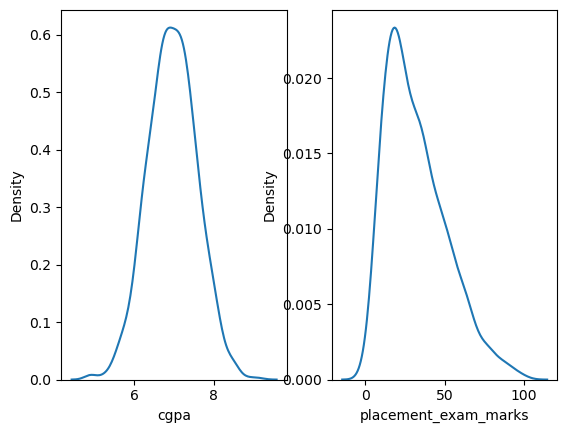

In [12]:
figure, (first, second) = plt.subplots(ncols=2)

sns.kdeplot(df, x="cgpa", ax=first)
sns.kdeplot(df, x="placement_exam_marks", ax=second)


In [13]:
from scipy.stats import zscore

cgpa_z_score = zscore(df["cgpa"])
df.insert(1, "cgpa_z_score", cgpa_z_score)
df.describe()

,cgpa,cgpa_z_score,placement_exam_marks,placed
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,6.961240,-1.465494e-16,32.225000,0.489000
std,0.615898,1.000500e+00,19.130822,0.500129
min,4.890000,-3.364643e+00,0.000000,0.000000
25%,6.550000,-6.680422e-01,17.000000,0.000000
50%,6.960000,-2.014328e-03,28.000000,0.000000
75%,7.370000,6.640135e-01,44.000000,1.000000
max,9.120000,3.506815e+00,100.000000,1.000000


In [14]:
# Trimming

cond = df[(df["cgpa_z_score"] < -3) | (df["cgpa_z_score"] > 3)]
new_df = df.drop(cond.index)
new_df.describe()

,cgpa,cgpa_z_score,placement_exam_marks,placed
count,995.000000,995.000000,995.000000,995.000000
mean,6.963357,0.003439,32.188945,0.487437
std,0.600082,0.974808,19.130298,0.500094
min,5.230000,-2.812327,0.000000,0.000000
25%,6.550000,-0.668042,17.000000,0.000000
50%,6.960000,-0.002014,28.000000,0.000000
75%,7.365000,0.655891,44.000000,1.000000
max,8.620000,2.694586,100.000000,1.000000


In [20]:
# Capping

upper_limit = df["cgpa"].mean() + 3 * df["cgpa"].std()
lower_limit = df["cgpa"].mean() - 3 * df["cgpa"].std()

new_df = df.where(cond=df["cgpa"] < upper_limit, other=upper_limit)
new_df = new_df.where(cond=new_df["cgpa"] > lower_limit, other=lower_limit)

new_df.describe()

,cgpa,cgpa_z_score,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.961499,0.036380,32.060959,0.517959
std,0.612688,1.085382,19.168098,0.671423
min,5.113546,-2.812327,0.000000,0.000000
25%,6.550000,-0.668042,17.000000,0.000000
50%,6.960000,0.014230,28.000000,0.000000
75%,7.370000,0.664014,44.000000,1.000000
max,8.808934,8.808934,100.000000,8.808934


---

#### **2. Interquartile proximity rule (If the data is skewed)**

he data points that fall below

**Q1 – 1.5 IQR** or above the third quartile **Q3 + 1.5 IQR** 

are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively.

<img src="../assets/iqr_rule.png"/>

In [36]:
import os
import pandas as pd
from scipy.stats import iqr

In [37]:
path = os.path.join("..","data","placement.csv")

df = pd.read_csv(path)
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks'>

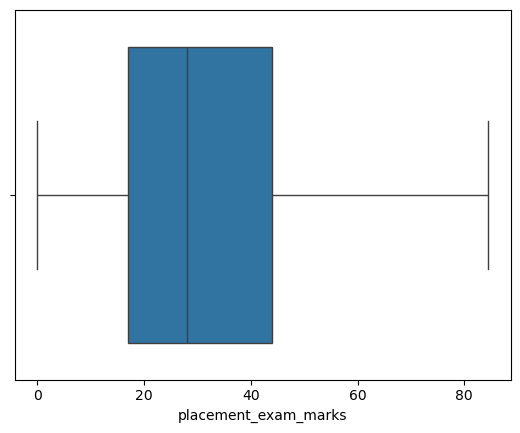

In [38]:
sns.boxplot(new_df, x="placement_exam_marks")

In [39]:
upper_limit = df["placement_exam_marks"].quantile(.75) + 1.5 * iqr(df["placement_exam_marks"])
lower_limit = df["placement_exam_marks"].quantile(.25) - 1.5 * iqr(df["placement_exam_marks"])

upper_limit, lower_limit

(84.5, -23.5)

In [40]:
# Trimming

cond = df[(df["placement_exam_marks"] > upper_limit) | (df["placement_exam_marks"] < lower_limit)]
new_df = df.drop(cond.index)
new_df.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961594,31.339086,0.48934
std,0.614734,17.857633,0.50014
min,4.890000,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,9.120000,83.000000,1.00000


<Axes: xlabel='placement_exam_marks'>

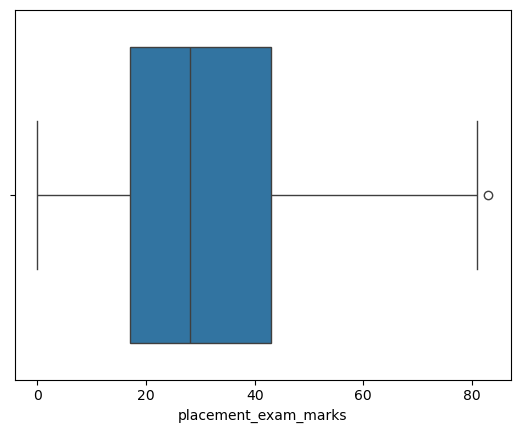

In [41]:
sns.boxplot(new_df, x="placement_exam_marks")

In [42]:
# Capping

new_df = df.where(df["placement_exam_marks"] < upper_limit, other=upper_limit)
new_df = new_df.where(new_df["placement_exam_marks"] > lower_limit, other=lower_limit)
new_df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,8.124670,32.136500,1.749500
std,9.449416,18.865419,10.228863
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.970000,28.000000,0.000000
75%,7.390000,44.000000,1.000000
max,84.500000,84.500000,84.500000


<Axes: xlabel='placement_exam_marks'>

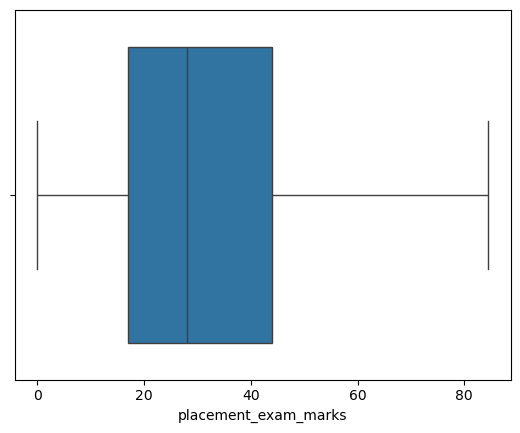

In [43]:
sns.boxplot(new_df, x="placement_exam_marks")

---

#### **3. Percentile based outlier detection (Winsorization)**

<img src="../assets/percentile_based_outlier_detection.png"/>

In [56]:
df = pd.read_csv(path)
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [48]:
threshold = 0.01

upper_limit = df["placement_exam_marks"].quantile(1 - threshold)
lower_limit = df["placement_exam_marks"].quantile(threshold)

upper_limit, lower_limit

(87.0, 4.0)

In [49]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [51]:
# Trimming

new_df = df.drop(df[(df["placement_exam_marks"] > upper_limit) | (df["placement_exam_marks"] < lower_limit)].index)
new_df.describe()

,cgpa,placement_exam_marks,placed
count,986.000000,986.000000,986.000000
mean,6.963682,31.909736,0.488844
std,0.613742,18.294183,0.500129
min,4.890000,4.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,87.000000,1.000000


In [57]:
# Capping or Winsorize

from scipy.stats.mstats import winsorize

df.insert(1, "placement_exam_marks_wins", winsorize(df["placement_exam_marks"], limits=threshold))
df.describe()

/home/sunder-kirei/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sunder-kirei/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/sunder-kirei/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,cgpa,placement_exam_marks_wins,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.961240,32.183000,32.225000,0.489000
std,0.615898,18.944509,19.130822,0.500129
min,4.890000,4.000000,0.000000,0.000000
25%,6.550000,17.000000,17.000000,0.000000
50%,6.960000,28.000000,28.000000,0.000000
75%,7.370000,44.000000,44.000000,1.000000
max,9.120000,87.000000,100.000000,1.000000


---

### **Outlier Handling**

#### **1. Trimming (Removing outliers)**

#### **2. Capping (Limiting data values)**

#### **3. Treat as missing values**

#### **4. Discreatization (Binning) of data**